In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

#### To get the image

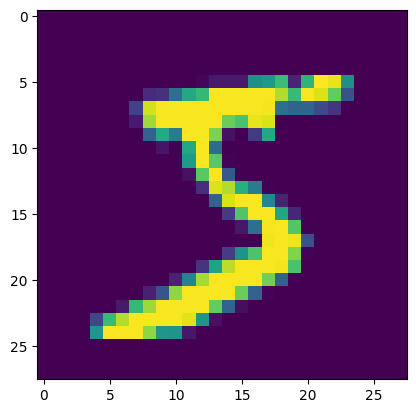

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0]) # We can get every image by increasing the indexes.

In [11]:
# To have similar kind of ranges of x_train
# By dividing it by 255 to make the values in 0 to 1 range
x_train=x_train/255
x_test=x_test/255


ANN(Artificial Neural Network)

In [23]:
# Making the layers by making model
# To make the layer flatten from 2D to 1D

model=Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))# Because we have more than one nodes use Soft max

In [33]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


To build the model




In [28]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [29]:
#To train the model

history=model.fit(x_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0092 - accuracy: 0.9970 - val_loss: 0.1630 - val_accuracy: 0.9765
Epoch 2/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0062 - accuracy: 0.9981 - val_loss: 0.1731 - val_accuracy: 0.9744
Epoch 3/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0065 - accuracy: 0.9981 - val_loss: 0.1788 - val_accuracy: 0.9761
Epoch 4/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0075 - accuracy: 0.9974 - val_loss: 0.1950 - val_accuracy: 0.9718
Epoch 5/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0081 - accuracy: 0.9976 - val_loss: 0.1814 - val_accuracy: 0.9750
Epoch 6/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.1759 - val_accuracy: 0.9756
Epoch 7/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0056 - accuracy: 0.9984 - val_loss: 0.1839 - val_accura

To predict the model and calculate that probability

In [35]:
y_prob=model.predict(x_test)
y_pred=y_prob.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9761

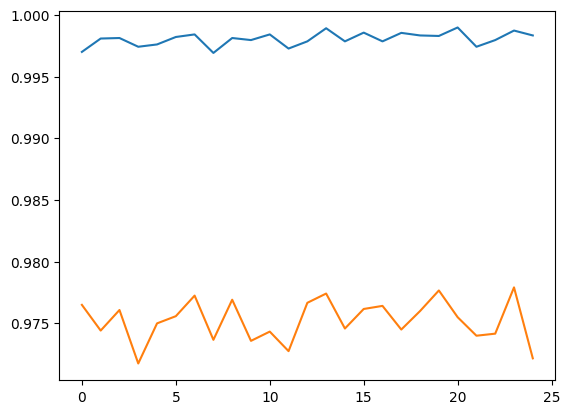

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

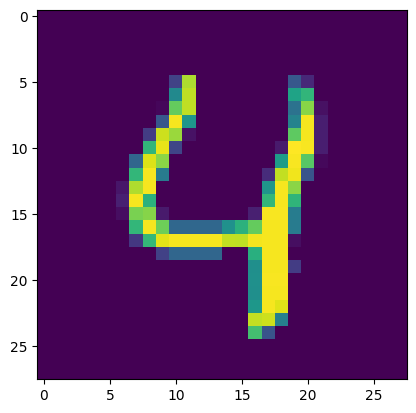

In [49]:
plt.imshow(x_test[4])


In [48]:
# Putting the model to predict the digit

model.predict(x_test[4].reshape(1,28,28)) # Getting the probabilities of the digit

1/1 [==============================] - 0s 35ms/step


array([[5.5211512e-25, 1.4879161e-16, 7.5191372e-13, 6.3244542e-14,
        8.5491607e-28, 7.7373986e-24, 7.1915282e-31, 1.0000000e+00,
        5.5710976e-19, 9.0326412e-13]], dtype=float32)

In [50]:
model.predict(x_test[4].reshape(1,28,28)).argmax(axis=1) # Getting the recognition of the value

1/1 [==============================] - 0s 115ms/step


array([4])